In [1225]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [1226]:

season_stats = pd.read_csv("Seasons_Stats.csv")
team_records = pd.read_csv("Team_Records.csv")

season_stats.head()


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [1227]:
#create new data frame with only needed columns
df = season_stats[['Year', 'Player', 'Pos', 'Tm', '3PAr', 'OWS', 'WS', 'WS/48', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'PTS']].copy()

df.head()


,Year,Player,Pos,Tm,3PAr,OWS,WS,WS/48,FG,FGA,FG%,3P,3PA,3P%,PTS
0,1950.0,Curly Armstrong,G-F,FTW,NaN,-0.1,3.5,NaN,144.0,516.0,0.279,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,INO,NaN,1.6,2.2,NaN,102.0,274.0,0.372,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,CHS,NaN,0.9,3.6,NaN,174.0,499.0,0.349,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,TOT,NaN,-0.5,-0.6,NaN,22.0,86.0,0.256,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,DNN,NaN,-0.5,-0.6,NaN,21.0,82.0,0.256,NaN,NaN,NaN,59.0


In [1228]:
#drop NaN 3P% rows -- will drop all before 1980 bc that's when 3 point line created
df = df[np.isfinite(df['3P%'])]
df.Tm.unique()
#df.head()



array(['LAL', 'GSW', 'PHO', 'BOS', 'WSB', 'IND', 'HOU', 'POR', 'TOT',
       'MIL', 'DET', 'CHI', 'PHI', 'KCK', 'UTA', 'DEN', 'NJN', 'SEA',
       'SDC', 'CLE', 'NYK', 'ATL', 'SAS', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [1229]:
#drop TOT players for clarity
df = df[df.Tm != "TOT"]
df.Tm.unique()

array(['LAL', 'GSW', 'PHO', 'BOS', 'WSB', 'IND', 'HOU', 'POR', 'MIL',
       'DET', 'CHI', 'PHI', 'KCK', 'UTA', 'DEN', 'NJN', 'SEA', 'SDC',
       'CLE', 'NYK', 'ATL', 'SAS', 'DAL', 'LAC', 'SAC', 'CHH', 'MIA',
       'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK',
       'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [1230]:
#replace old team names with current team names
df = df.replace('VAN', 'MEM')
df = df.replace('NJN', 'BRK')
df = df.replace('SDC', 'LAC')
df = df.replace('SEA', 'OKC')
df = df.replace('WSB', 'WAS')
df = df.replace('KCK', 'SAC')
df = df.replace('SEA', 'OKC')
df = df.replace('CHH', 'CHA')
df = df.replace('NOK', 'NOP')
df = df.replace('NOH', 'NOP')
df = df.replace('CHH', 'CHA')
df = df.replace('CHO', 'CHA')



In [1231]:
team_records.head()
teamdf = team_records[['Season', 'Team', 'W', 'L', 'W/L%', 'Finish', 'ORtg', 'Top WS']].copy()
teamdf.head()





,Season,Team,W,L,W/L%,Finish,ORtg,Top WS
0,2017-18,Boston Celtics,29,10,0.744,1,108.0,K. Irving (5.7)
1,2016-17,Boston Celtics*,53,29,0.646,1,111.2,I. Thomas (12.5)
2,2015-16,Boston Celtics*,48,34,0.585,2,106.8,I. Thomas (9.7)
3,2014-15,Boston Celtics*,40,42,0.488,2,104.7,T. Zeller (6.5)
4,2013-14,Boston Celtics,25,57,0.305,4,102.9,B. Bass (5.1)


In [1232]:
#add column with team acronym


In [1233]:
teamdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 8 columns):
Season    1483 non-null object
Team      1483 non-null object
W         1483 non-null int64
L         1483 non-null int64
W/L%      1483 non-null float64
Finish    1483 non-null int64
ORtg      1463 non-null float64
Top WS    1483 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 92.8+ KB


In [1234]:
teamdf=teamdf.sort_values(by=['Season'],ascending=True)
teamdf = teamdf[teamdf.Season >= "1980-81"]
teamdf.head()




,Season,Team,W,L,W/L%,Finish,ORtg,Top WS
595,1980-81,Detroit Pistons,21,61,0.256,6,98.1,T. Tyler (6.4)
353,1980-81,Seattle SuperSonics,34,48,0.415,6,103.2,J. Sikma (8.0)
1459,1980-81,Dallas Mavericks,15,67,0.183,6,102.4,J. Spanarkel (5.5)
988,1980-81,Kansas City Kings*,40,42,0.488,2,104.7,R. King (8.3)
455,1980-81,Portland Trail Blazers*,45,37,0.549,3,106.5,J. Paxson (7.7)


In [1235]:
#Replace old team names
df = df.replace('VAN', 'MEM')
df = df.replace('NJN', 'BRK')
df = df.replace('SDC', 'LAC')
df = df.replace('WSB', 'WAS')
df = df.replace('KCK', 'SAC')
df = df.replace('SEA', 'OKC')
df = df.replace('CHH', 'CHA')
df = df.replace('NOK', 'NOP')
df = df.replace('NOH', 'NOP')
df = df.replace('CHH', 'CHA')
df = df.replace('CHO', 'CHA')



In [1236]:
len(teamdf.Team.unique())
df.head()

,Year,Player,Pos,Tm,3PAr,OWS,WS,WS/48,FG,FGA,FG%,3P,3PA,3P%,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,LAL,0.001,9.5,14.8,0.227,835.0,1383.0,0.604,0.0,1.0,0.000,2034.0
5728,1980.0,Tom Abernethy,PF,GSW,0.003,1.2,2.0,0.080,153.0,318.0,0.481,0.0,1.0,0.000,362.0
5729,1980.0,Alvan Adams,C,PHO,0.002,3.1,7.0,0.155,465.0,875.0,0.531,0.0,2.0,0.000,1118.0
5730,1980.0,Tiny Archibald*,PG,BOS,0.023,5.9,8.9,0.148,383.0,794.0,0.482,4.0,18.0,0.222,1131.0
5732,1980.0,Gus Bailey,SG,WAS,0.029,0.0,0.2,0.043,16.0,35.0,0.457,1.0,1.0,1.000,38.0


In [1237]:
#Replace starred names -- noticed the stars UNTIDY DATAAA
teamdf = teamdf.replace('Detroit Pistons*', 'Detroit Pistons')
teamdf = teamdf.replace('Seattle SuperSonics*', 'Seattle SuperSonics')
teamdf = teamdf.replace('Dallas Mavericks*', 'Dallas Mavericks')
teamdf = teamdf.replace('Kansas City Kings*', 'Kansas City Kings')
teamdf = teamdf.replace('Portland Trail Blazers*', 'Portland Trail Blazers')
teamdf = teamdf.replace('San Diego Clippers*', 'San Diego Clippers')
teamdf = teamdf.replace('Philadelphia 76ers*', 'Philadelphia 76ers')
teamdf = teamdf.replace('New Jersey Nets*', 'New Jersey Nets')
teamdf = teamdf.replace('Milwaukee Bucks*', 'Milwaukee Bucks')
teamdf = teamdf.replace('Golden State Warriors*', 'Golden State Warriors')
teamdf = teamdf.replace('Indiana Pacers*', 'Indiana Pacers')
teamdf = teamdf.replace('Chicago Bulls*', 'Chicago Bulls')
teamdf = teamdf.replace('New York Knicks*', 'New York Knicks')
teamdf = teamdf.replace('Denver Nuggets*', 'Denver Nuggets')
teamdf = teamdf.replace('Boston Celtics*', 'Boston Celtics')
teamdf = teamdf.replace('San Antonio Spurs*', 'San Antonio Spurs')
teamdf = teamdf.replace('Houston Rockets*', 'Houston Rockets')
teamdf = teamdf.replace('Phoenix Suns*', 'Phoenix Suns')
teamdf = teamdf.replace('Utah Jazz*', 'Utah Jazz')
teamdf = teamdf.replace('Los Angeles Lakers*', 'Los Angeles Lakers')
teamdf = teamdf.replace('Washington Bullets*', 'Washington Bullets')
teamdf = teamdf.replace('Atlanta Hawks*', 'Atlanta Hawks')
teamdf = teamdf.replace('Sacramento Kings*', 'Sacramento Kings')
teamdf = teamdf.replace('Los Angeles Clippers*', 'Los Angeles Clippers')
teamdf = teamdf.replace('Sacramento Kings*', 'Sacramento Kings')
teamdf = teamdf.replace('Cleveland Cavaliers*', 'Cleveland Cavaliers')
teamdf = teamdf.replace('Miami Heat*', 'Miami Heat')
teamdf = teamdf.replace('Charlotte Hornets*', 'Charlotte Hornets')
teamdf = teamdf.replace('Orlando Magic*', 'Orlando Magic')
teamdf = teamdf.replace('Minnesota Timberwolves*', 'Minnesota Timberwolves')
teamdf = teamdf.replace('Vancouver Grizzlies*', 'Vancouver Grizzlies')
teamdf = teamdf.replace('Toronto Raptors*', 'Toronto Raptors')
teamdf = teamdf.replace('Washington Wizards*', 'Washington Wizards')
teamdf = teamdf.replace('Memphis Grizzlies*', 'Memphis Grizzlies')
teamdf = teamdf.replace('New Orleans Hornets*', 'New Orleans Hornets')
teamdf = teamdf.replace('Charlotte Bobcats*', 'Charlotte Bobcats')
teamdf = teamdf.replace('New Orleans/Oklahoma City Hornets*', 'New Orleans/Oklahoma City Hornets')
teamdf = teamdf.replace('Oklahoma City Thunder*', 'Oklahoma City Thunder')
teamdf = teamdf.replace('Brooklyn Nets*', 'Brooklyn Nets')
teamdf = teamdf.replace('New Orleans Pelicans*', 'New Orleans Pelicans')

teamdf.head()

,Season,Team,W,L,W/L%,Finish,ORtg,Top WS
595,1980-81,Detroit Pistons,21,61,0.256,6,98.1,T. Tyler (6.4)
353,1980-81,Seattle SuperSonics,34,48,0.415,6,103.2,J. Sikma (8.0)
1459,1980-81,Dallas Mavericks,15,67,0.183,6,102.4,J. Spanarkel (5.5)
988,1980-81,Kansas City Kings,40,42,0.488,2,104.7,R. King (8.3)
455,1980-81,Portland Trail Blazers,45,37,0.549,3,106.5,J. Paxson (7.7)


In [1238]:
#Replace old team names
teamdf = teamdf.replace('Vancouver Grizzlies', 'Memphis Grizzlies')
teamdf = teamdf.replace('New Jersey Nets', 'Brooklyn Nets')
teamdf = teamdf.replace('San Diego Clippers', 'Los Angeles Clippers')
teamdf = teamdf.replace('Seattle SuperSonics', 'Oklahoma City Thunder')
teamdf = teamdf.replace('Washington Bullets', 'Washington Wizards')
teamdf = teamdf.replace('Kansas City Kings', 'Sacramento Kings')
teamdf = teamdf.replace('Charlotte Bobcats', 'Charlotte Hornets')
teamdf = teamdf.replace('New Orleans/Oklahoma City Hornets', 'New Orleans Pelicans')
teamdf = teamdf.replace('New Orleans Hornets', 'New Orleans Pelicans')

len(teamdf.Team.unique())

30

In [1239]:
#Add team acronym column
teamdf['Acronym'] = teamdf['Team']

teamdf['Acronym'] = teamdf['Acronym'].replace("Atlanta Hawks", "ATL")
teamdf['Acronym'] = teamdf['Acronym'].replace("Brooklyn Nets", "BKN")
teamdf['Acronym'] = teamdf['Acronym'].replace("Boston Celtics", "BOS")
teamdf['Acronym'] = teamdf['Acronym'].replace("Detroit Pistons", "DET")
teamdf['Acronym'] = teamdf['Acronym'].replace("Charlotte Hornets", "CHA")
teamdf['Acronym'] = teamdf['Acronym'].replace("Chicago Bulls", "CHI")
teamdf['Acronym'] = teamdf['Acronym'].replace("Cleveland Cavaliers", "CLE")
teamdf['Acronym'] = teamdf['Acronym'].replace("Dallas Mavericks", "DAL")
teamdf['Acronym'] = teamdf['Acronym'].replace("Denver Nuggets", "DEN")
teamdf['Acronym'] = teamdf['Acronym'].replace("Detroit Pistons", "DET")
teamdf['Acronym'] = teamdf['Acronym'].replace("Golden State Warriors", "GSW")
teamdf['Acronym'] = teamdf['Acronym'].replace("Houston Rockets", "HOU")
teamdf['Acronym'] = teamdf['Acronym'].replace("Los Angeles Clippers", "LAC")
teamdf['Acronym'] = teamdf['Acronym'].replace("Los Angeles Lakers", "LAL")
teamdf['Acronym'] = teamdf['Acronym'].replace("Memphis Grizzlies", "MEM")
teamdf['Acronym'] = teamdf['Acronym'].replace("Miami Heat", "MIA")
teamdf['Acronym'] = teamdf['Acronym'].replace("Milwaukee Bucks", "MIL")
teamdf['Acronym'] = teamdf['Acronym'].replace("Minnesota Timberwolves", "MIN")
teamdf['Acronym'] = teamdf['Acronym'].replace("New Orleans Pelicans", "NOP")
teamdf['Acronym'] = teamdf['Acronym'].replace("New York Knicks", "NYK")
teamdf['Acronym'] = teamdf['Acronym'].replace("Oklahoma City Thunder", "OKC")
teamdf['Acronym'] = teamdf['Acronym'].replace("Orlando Magic", "ORL")
teamdf['Acronym'] = teamdf['Acronym'].replace("Philadelphia 76ers", "PHI")
teamdf['Acronym'] = teamdf['Acronym'].replace("Phoenix Suns", "PHX")
teamdf['Acronym'] = teamdf['Acronym'].replace("Portland Trail Blazers", "POR")
teamdf['Acronym'] = teamdf['Acronym'].replace("Sacramento Kings", "SAC")
teamdf['Acronym'] = teamdf['Acronym'].replace("San Antonio Spurs", "SAS")
teamdf['Acronym'] = teamdf['Acronym'].replace("Toronto Raptors", "TOR")
teamdf['Acronym'] = teamdf['Acronym'].replace("Utah Jazz", "UTA")
teamdf['Acronym'] = teamdf['Acronym'].replace("Washington Wizards", "WAS")

teamdf.Season = teamdf.Season.str.slice(0, 4)



In [1240]:
#convert season datatype to int
teamdf = teamdf.astype({"Season": int})
teamdf.head()



,Season,Team,W,L,W/L%,Finish,ORtg,Top WS,Acronym
595,1980,Detroit Pistons,21,61,0.256,6,98.1,T. Tyler (6.4),DET
353,1980,Oklahoma City Thunder,34,48,0.415,6,103.2,J. Sikma (8.0),OKC
1459,1980,Dallas Mavericks,15,67,0.183,6,102.4,J. Spanarkel (5.5),DAL
988,1980,Sacramento Kings,40,42,0.488,2,104.7,R. King (8.3),SAC
455,1980,Portland Trail Blazers,45,37,0.549,3,106.5,J. Paxson (7.7),POR


In [1241]:
#convert year datatype to int
df = df.astype({"Year": int})
df.head()

,Year,Player,Pos,Tm,3PAr,OWS,WS,WS/48,FG,FGA,FG%,3P,3PA,3P%,PTS
5727,1980,Kareem Abdul-Jabbar*,C,LAL,0.001,9.5,14.8,0.227,835.0,1383.0,0.604,0.0,1.0,0.000,2034.0
5728,1980,Tom Abernethy,PF,GSW,0.003,1.2,2.0,0.080,153.0,318.0,0.481,0.0,1.0,0.000,362.0
5729,1980,Alvan Adams,C,PHO,0.002,3.1,7.0,0.155,465.0,875.0,0.531,0.0,2.0,0.000,1118.0
5730,1980,Tiny Archibald*,PG,BOS,0.023,5.9,8.9,0.148,383.0,794.0,0.482,4.0,18.0,0.222,1131.0
5732,1980,Gus Bailey,SG,WAS,0.029,0.0,0.2,0.043,16.0,35.0,0.457,1.0,1.0,1.000,38.0


In [1242]:
#add 3pt stats to team dataframe
arr = []
x =  df.groupby(["Year", "Tm"])

for (year, team) , g in df.groupby(["Year", "Tm"]):
    three_percentage_mean = g["3P%"].mean()
    three_attempt_ratio_mean = g["3PAr"].mean()
    three_made_sum = g["3P"].sum()
    three_attempt_sum = g["3PA"].sum()
    points_sum = g["PTS"].sum()
    arr.append([year, team,three_percentage_mean,three_attempt_ratio_mean, three_made_sum,three_attempt_sum, points_sum])
    
result = pd.DataFrame(arr)
result = result.rename(index=str, columns = {0: "Season", 1: "Acronym", 2: "3P%_mean", 3: "3PAr_mean", 4: "3P_sum", 5: "3PA_sum", 6: "PTS_sum"})

merged_df = teamdf.merge(result, how = "inner", left_on = ["Season", "Acronym"], right_on = ["Season", "Acronym"])
merged_df.tail()



,Season,Team,W,L,W/L%,Finish,ORtg,Top WS,Acronym,3P%_mean,3PAr_mean,3P_sum,3PA_sum,PTS_sum
924,2017,New Orleans Pelicans,18,17,0.514,3,110.6,A. Davis (5.5),NOP,0.326417,0.390042,768.0,2196.0,8384.0
925,2017,Philadelphia 76ers,15,19,0.441,4,105.8,J. Embiid (2.6),PHI,0.303950,0.337950,831.0,2443.0,7810.0
926,2017,Dallas Mavericks,12,25,0.324,4,105.6,D. Nowitzki (2.4),DAL,0.278739,0.349609,878.0,2473.0,7841.0
927,2017,New York Knicks,17,18,0.486,3,107.6,E. Kanter (3.7),NYK,0.281067,0.292267,704.0,2022.0,8516.0
928,2017,Boston Celtics,29,10,0.744,1,108.0,K. Irving (5.7),BOS,0.351133,0.350733,985.0,2742.0,8857.0


In [1243]:
##Some of the teams do not have data for all 82 games for the 2017 season so we will not use that data.
merged_df = merged_df[merged_df.Season <=2016]
merged_df.head()




,Season,Team,W,L,W/L%,Finish,ORtg,Top WS,Acronym,3P%_mean,3PAr_mean,3P_sum,3PA_sum,PTS_sum
0,1980,Detroit Pistons,21,61,0.256,6,98.1,T. Tyler (6.4),DET,0.150286,0.049429,57.0,219.0,8221.0
1,1980,Oklahoma City Thunder,34,48,0.415,6,103.2,J. Sikma (8.0),OKC,0.174000,0.031000,59.0,189.0,6647.0
2,1980,Sacramento Kings,40,42,0.488,2,104.7,R. King (8.3),SAC,0.183583,0.017833,25.0,114.0,8595.0
3,1980,Portland Trail Blazers,45,37,0.549,3,106.5,J. Paxson (7.7),POR,0.201786,0.027571,26.0,132.0,8276.0
4,1980,Los Angeles Clippers,36,46,0.439,5,106.0,S. Nater (8.6),LAC,0.194556,0.086778,177.0,543.0,8059.0


In [1244]:
merged_df['3PScored'] = 0
merged_df['OtherScored'] = 0

for index,row in merged_df.iterrows():
    threePoints = row["3P_sum"] * 3
    other = row["PTS_sum"] - threePoints
    
    merged_df.at[index, "3PScored"] = threePoints
    merged_df.at[index, "OtherScored"] = other
    
merged_df.head()


    

,Season,Team,W,L,W/L%,Finish,ORtg,Top WS,Acronym,3P%_mean,3PAr_mean,3P_sum,3PA_sum,PTS_sum,3PScored,OtherScored
0,1980,Detroit Pistons,21,61,0.256,6,98.1,T. Tyler (6.4),DET,0.150286,0.049429,57.0,219.0,8221.0,171,8050
1,1980,Oklahoma City Thunder,34,48,0.415,6,103.2,J. Sikma (8.0),OKC,0.174000,0.031000,59.0,189.0,6647.0,177,6470
2,1980,Sacramento Kings,40,42,0.488,2,104.7,R. King (8.3),SAC,0.183583,0.017833,25.0,114.0,8595.0,75,8520
3,1980,Portland Trail Blazers,45,37,0.549,3,106.5,J. Paxson (7.7),POR,0.201786,0.027571,26.0,132.0,8276.0,78,8198
4,1980,Los Angeles Clippers,36,46,0.439,5,106.0,S. Nater (8.6),LAC,0.194556,0.086778,177.0,543.0,8059.0,531,7528


# Exploratory  Data Analysis 

In [1245]:
#wins to each 3 data column -- divide times into five periods

Text(0.5,1,'Three Point Attempts per Team Over Time')

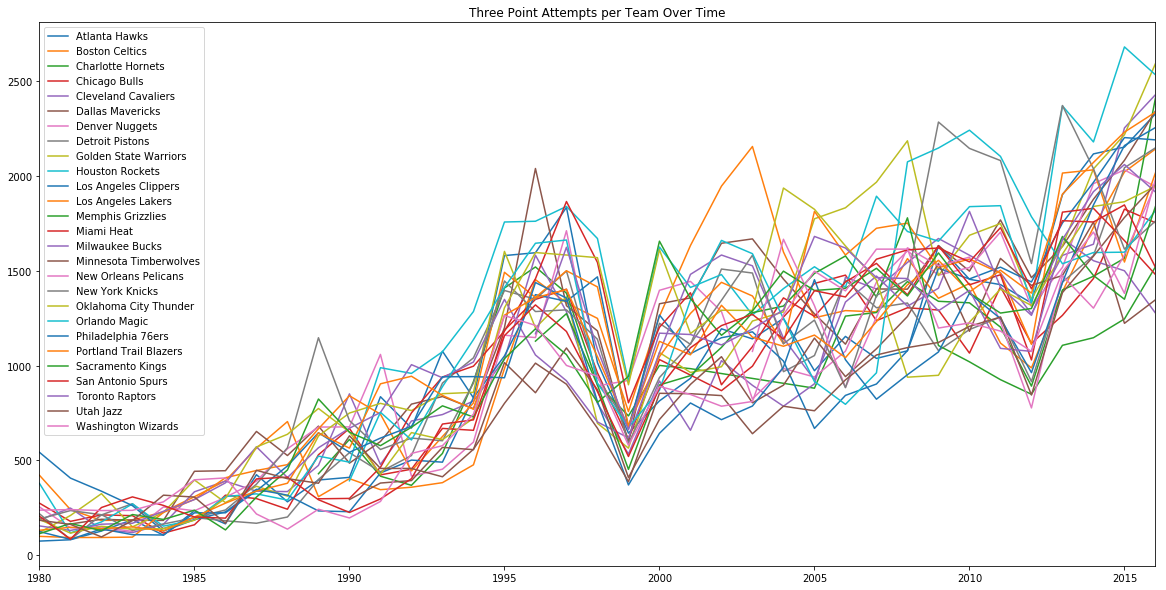

In [1246]:
i=0
fig, ax = plt.subplots(figsize=(20,10))

for key , g in merged_df.groupby(["Team"]):
    ax.plot(g["Season"], g["3PA_sum"], label = key)
    
ax.set_xlim(1980,2016)
ax.legend()
plt.title('Three Point Attempts per Team Over Time')


#Low spikes due to NBA lockout -- did not play games


In [1247]:
#split data into time periods of 1980-1989, 1990-2002, 2003-2010, 2011-present)

df1 = merged_df.loc[merged_df['Season'] < 1990]
df2 = merged_df.loc[merged_df['Season'] < 2003]
df2 = df2.loc[merged_df['Season'] >= 1990]
df3 = merged_df.loc[merged_df['Season'] < 2011]
df3 = df3.loc[merged_df['Season'] >= 2003]
df4 = merged_df.loc[merged_df['Season'] >= 2011]


df4.head()

,Season,Team,W,L,W/L%,Finish,ORtg,Top WS,Acronym,3P%_mean,3PAr_mean,3P_sum,3PA_sum,PTS_sum,3PScored,OtherScored
740,2011,Cleveland Cavaliers,21,45,0.318,5,101.1,K. Irving (4.1),CLE,0.257625,0.265625,509.0,1489.0,7371.0,1527,5844
741,2011,Houston Rockets,34,32,0.515,4,105.5,G. Dragic (5.1),HOU,0.262625,0.247750,677.0,1843.0,8626.0,2031,6595
742,2011,Portland Trail Blazers,28,38,0.424,4,105.7,L. Aldridge (7.0),POR,0.306462,0.222308,518.0,1503.0,7798.0,1554,6244
743,2011,Golden State Warriors,23,43,0.348,4,105.4,D. Lee (5.0),GSW,0.290417,0.256833,685.0,1749.0,7607.0,2055,5552
744,2011,New Orleans Pelicans,21,45,0.318,5,100.9,J. Jack (3.8),NOP,0.237187,0.255875,444.0,1232.0,7594.0,1332,6262


In [1248]:
#1980-1989
arr = []

for (team, grp) in df1.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df1_averages = pd.DataFrame(arr)
df1_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df1_averages.head()

,Team,3PA_sum,3PAr_mean,3P_sum,3P%_mean,W,W/L%,ORtg,3PScored,OtherScored
0,Atlanta Hawks,2084.0,0.048794,555.0,0.175636,440,0.5366,108.00,1665,79353
1,Boston Celtics,3543.0,0.059616,1174.0,0.184398,583,0.7109,111.23,3522,73307
2,Charlotte Hornets,430.0,0.044867,134.0,0.244467,19,0.2320,102.00,402,8126
3,Chicago Bulls,2543.0,0.048680,652.0,0.152710,394,0.4805,107.65,1956,76945
4,Cleveland Cavaliers,2731.0,0.044894,812.0,0.152716,331,0.4035,104.93,2436,77904


In [1249]:
#1990-2002
arr = []

for (team, grp) in df2.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df2_averages = pd.DataFrame(arr)
df2_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df2_averages.head()

,Team,3PA_sum,3PAr_mean,3P_sum,3P%_mean,W,W/L%,ORtg,3PScored,OtherScored
0,Atlanta Hawks,13434.0,0.175806,4567.0,0.243674,527,0.512846,105.592308,13701,83532
1,Boston Celtics,12583.0,0.165937,4337.0,0.227504,489,0.470154,105.307692,13011,81679
2,Charlotte Hornets,10785.0,0.162983,3992.0,0.260806,503,0.528250,106.825000,11976,80690
3,Chicago Bulls,11238.0,0.155069,3987.0,0.265307,586,0.557462,106.007692,11961,82474
4,Cleveland Cavaliers,11431.0,0.163748,4243.0,0.251371,500,0.482154,105.038462,12729,78315


In [1250]:
#2003-2010
arr = []

for (team, grp) in df3.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df3_averages = pd.DataFrame(arr)
df3_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df3_averages.head()

,Team,3PA_sum,3PAr_mean,3P_sum,3P%_mean,W,W/L%,ORtg,3PScored,OtherScored
0,Atlanta Hawks,9721.0,0.191087,3395.0,0.274895,278,0.423750,105.650000,10185,50345
1,Boston Celtics,11931.0,0.246228,4280.0,0.270238,372,0.567125,106.575000,12840,48197
2,Charlotte Hornets,7535.0,0.232462,2684.0,0.301436,204,0.414667,103.866667,8052,30820
3,Chicago Bulls,10064.0,0.218749,3648.0,0.265059,337,0.513625,103.875000,10944,45377
4,Cleveland Cavaliers,10251.0,0.228236,3641.0,0.246368,368,0.561125,106.637500,10923,51084


In [1251]:
#2011-2016
arr = []

for (team, grp) in df4.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df4_averages = pd.DataFrame(arr)
df4_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df4_averages.head()

,Team,3PA_sum,3PAr_mean,3P_sum,3P%_mean,W,W/L%,ORtg,3PScored,OtherScored
0,Atlanta Hawks,11253.0,0.315612,4101.0,0.313043,273,0.574500,105.750000,12303,34004
1,Boston Celtics,9389.0,0.287276,3221.0,0.296398,246,0.520167,104.950000,9663,33437
2,Charlotte Hornets,8941.0,0.267102,3012.0,0.293924,188,0.385333,102.716667,9036,32913
3,Chicago Bulls,8834.0,0.272388,3180.0,0.279807,276,0.585667,105.550000,9540,34059
4,Cleveland Cavaliers,10664.0,0.324365,3786.0,0.283418,239,0.496000,107.533333,11358,32366


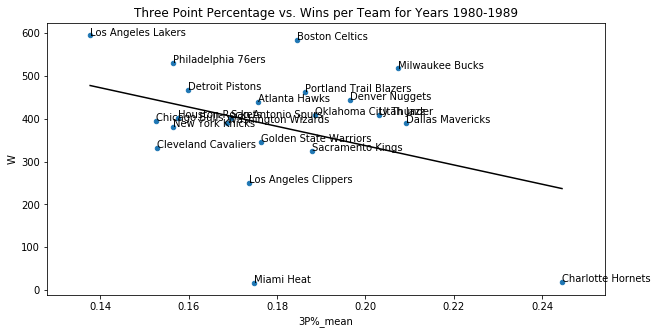

In [1252]:
#1980-1989 graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df1_averages['3P%_mean']), np.poly1d(np.polyfit(x = df1_averages['3P%_mean'], y = df1_averages['W'], deg = 1))(np.unique(df1_averages['3P%_mean'])), color = 'black')

plt.show()

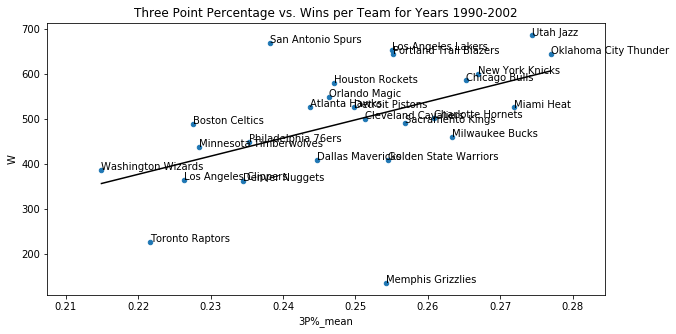

In [1253]:
#1990-2002 graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 1990-2002', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df2_averages['3P%_mean']), np.poly1d(np.polyfit(x = df2_averages['3P%_mean'], y = df2_averages['W'], deg = 1))(np.unique(df2_averages['3P%_mean'])), color = 'black')

plt.show()



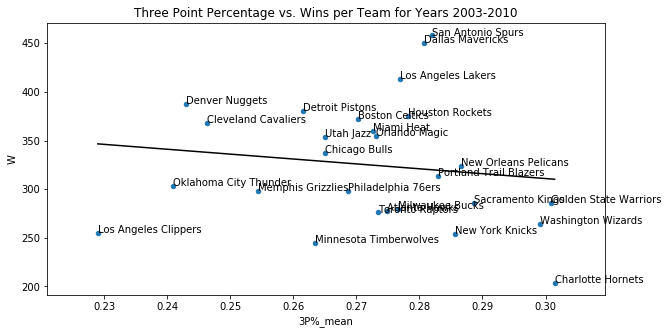

In [1254]:
#2003-2010 graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 2003-2010', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df3_averages['3P%_mean']), np.poly1d(np.polyfit(x = df3_averages['3P%_mean'], y = df3_averages['W'], deg = 1))(np.unique(df3_averages['3P%_mean'])), color = 'black')

plt.show()



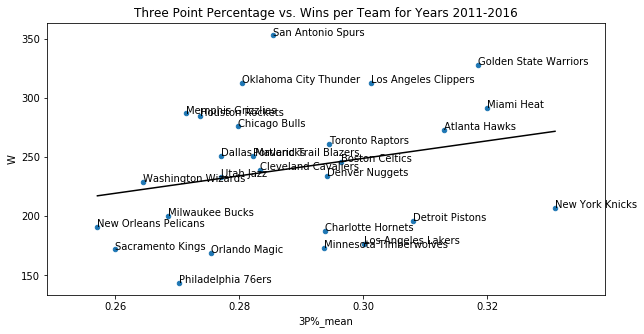

In [1255]:
#2011-2016 graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df4_averages['3P%_mean']), np.poly1d(np.polyfit(x = df4_averages['3P%_mean'], y = df4_averages['W'], deg = 1))(np.unique(df4_averages['3P%_mean'])), color = 'black')

plt.show()

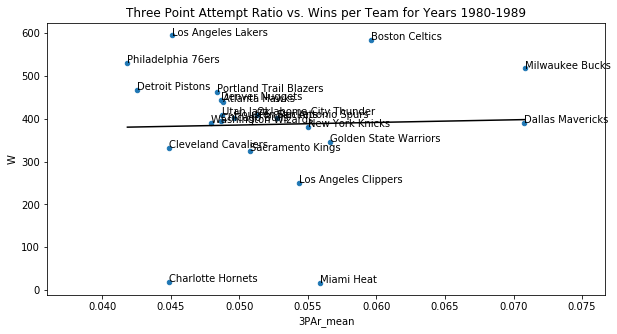

In [1256]:
#1980-1989 3 point attempt ratio graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df1_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df1_averages['3PAr_mean'], y = df1_averages['W'], deg = 1))(np.unique(df1_averages['3PAr_mean'])), color = 'black')

plt.show()

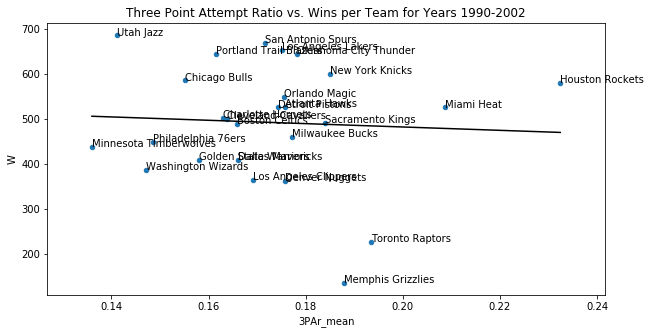

In [1257]:
#1990-2002 3 point attempt ratio graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 1990-2002', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df2_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df2_averages['3PAr_mean'], y = df2_averages['W'], deg = 1))(np.unique(df2_averages['3PAr_mean'])), color = 'black')

plt.show()

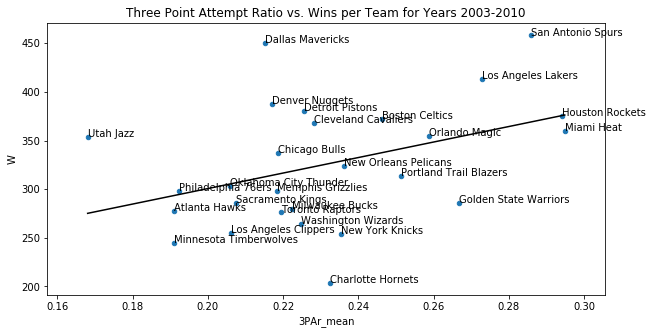

In [1258]:
#2003-2010 3 point attempt ratio graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 2003-2010', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df3_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df3_averages['3PAr_mean'], y = df3_averages['W'], deg = 1))(np.unique(df3_averages['3PAr_mean'])), color = 'black')

plt.show()

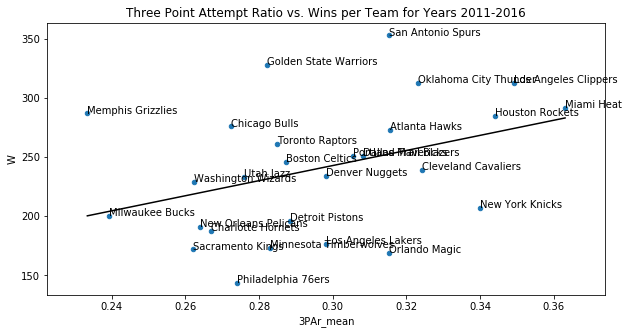

In [1259]:
#2011-2016 3 point attempt ratio graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df4_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df4_averages['3PAr_mean'], y = df4_averages['W'], deg = 1))(np.unique(df4_averages['3PAr_mean'])), color = 'black')

plt.show()

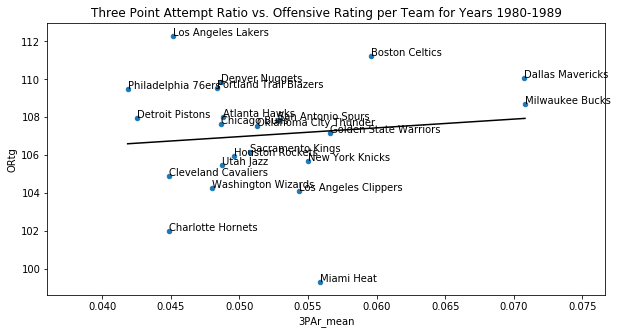

In [1260]:
#1980-1989 Ortg graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df1_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df1_averages['3PAr_mean'], y = df1_averages['ORtg'], deg = 1))(np.unique(df1_averages['3PAr_mean'])), color = 'black')

plt.show()

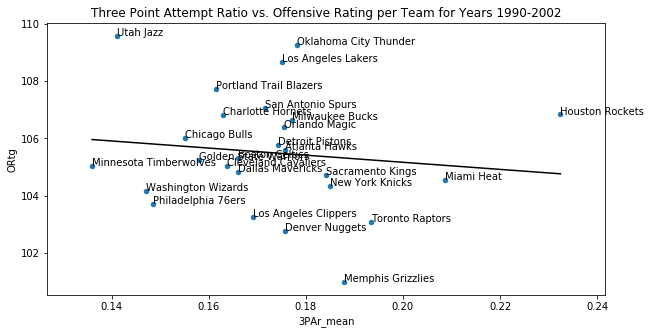

In [1261]:
#1990-2002 Ortg graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 1990-2002', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df2_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df2_averages['3PAr_mean'], y = df2_averages['ORtg'], deg = 1))(np.unique(df2_averages['3PAr_mean'])), color = 'black')

plt.show()

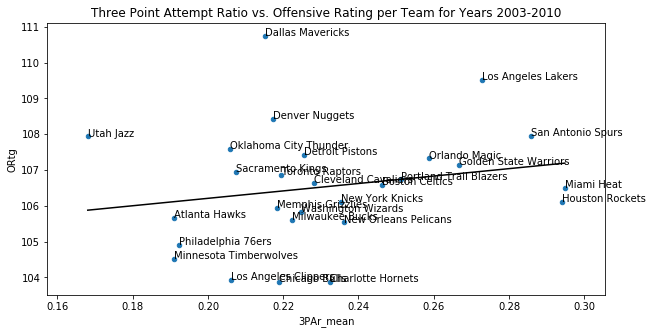

In [1262]:
#2003-2010 Ortg graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 2003-2010', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df3_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df3_averages['3PAr_mean'], y = df3_averages['ORtg'], deg = 1))(np.unique(df3_averages['3PAr_mean'])), color = 'black')

plt.show()

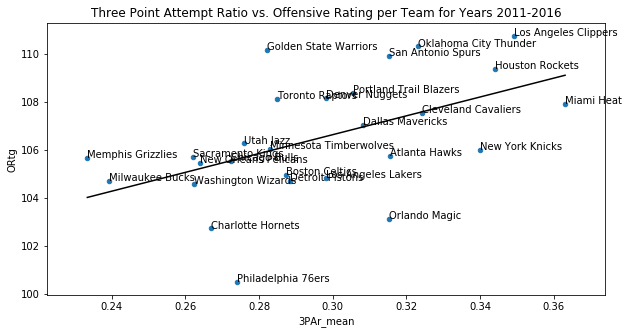

In [1263]:
#2011-2016 Ortg graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df4_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df4_averages['3PAr_mean'], y = df4_averages['ORtg'], deg = 1))(np.unique(df4_averages['3PAr_mean'])), color = 'black')

plt.show()

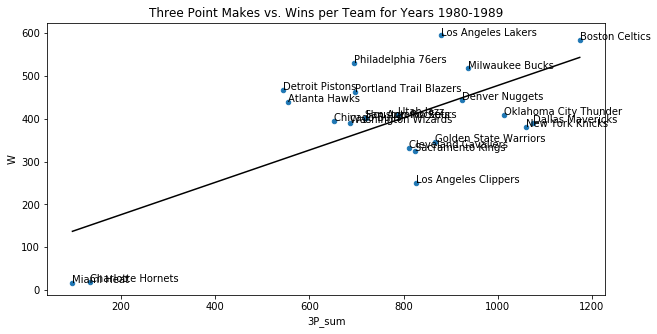

In [1264]:
#1980-1989 graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df1_averages['3P_sum']), np.poly1d(np.polyfit(x = df1_averages['3P_sum'], y = df1_averages['W'], deg = 1))(np.unique(df1_averages['3P_sum'])), color = 'black')

plt.show()

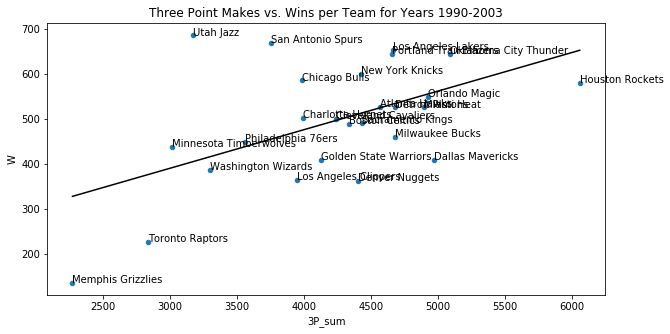

In [1265]:
#1990-2003 graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 1990-2003', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df2_averages['3P_sum']), np.poly1d(np.polyfit(x = df2_averages['3P_sum'], y = df2_averages['W'], deg = 1))(np.unique(df2_averages['3P_sum'])), color = 'black')

plt.show()

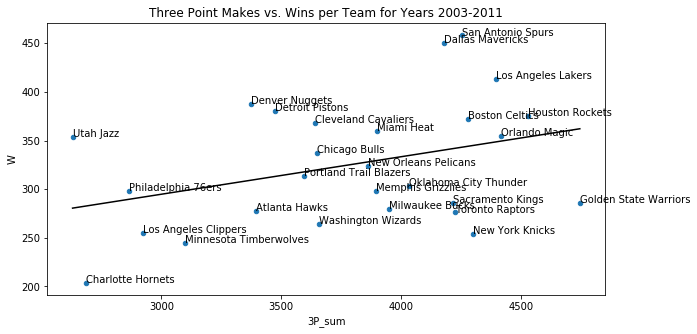

In [1266]:
#2003-2011 graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 2003-2011', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df3_averages['3P_sum']), np.poly1d(np.polyfit(x = df3_averages['3P_sum'], y = df3_averages['W'], deg = 1))(np.unique(df3_averages['3P_sum'])), color = 'black')

plt.show()

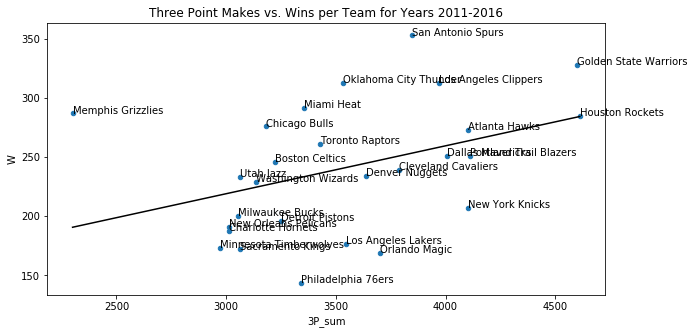

In [1267]:
#2011-2016 graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df4_averages['3P_sum']), np.poly1d(np.polyfit(x = df4_averages['3P_sum'], y = df4_averages['W'], deg = 1))(np.unique(df4_averages['3P_sum'])), color = 'black')

plt.show()

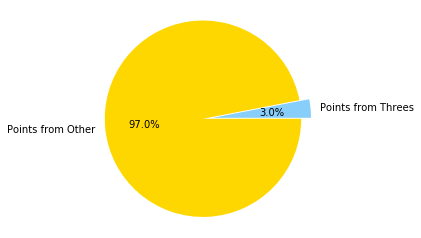

In [1268]:
labels = "Points from Threes", "Points from Other"
sizes = [df1["3PScored"].sum(), df1["OtherScored"].sum()]
colors = ['lightskyblue', 'gold']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')

plt.axis('equal')
plt.show()


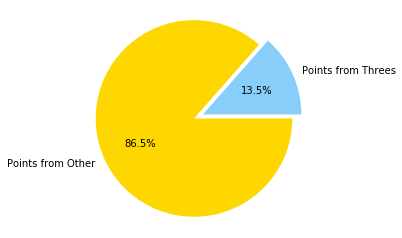

In [1269]:
labels = "Points from Threes", "Points from Other"
sizes = [df2["3PScored"].sum(), df2["OtherScored"].sum()]
colors = ['lightskyblue', 'gold']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

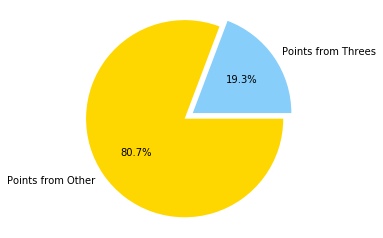

In [1270]:
labels = "Points from Threes", "Points from Other"
sizes = [df3["3PScored"].sum(), df3["OtherScored"].sum()]
colors = ['lightskyblue', 'gold']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

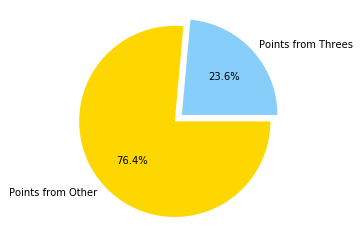

In [1271]:
labels = "Points from Threes", "Points from Other"
sizes = [df4["3PScored"].sum(), df4["OtherScored"].sum()]
colors = ['lightskyblue', 'gold']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

Text(0.5,1,'2011-2016')

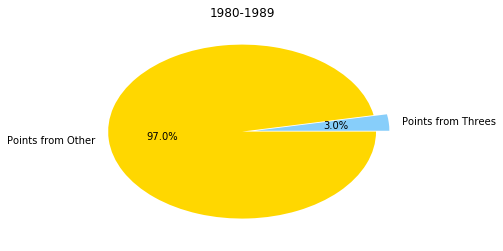

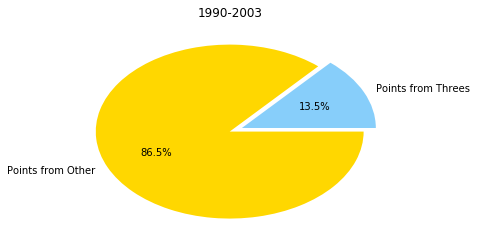

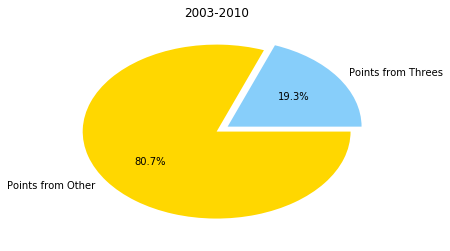

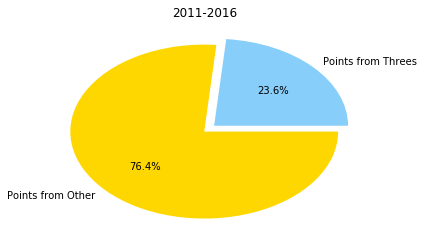

In [1272]:
sizes1 = [df1["3PScored"].sum(), df1["OtherScored"].sum()]
sizes2 = [df2["3PScored"].sum(), df2["OtherScored"].sum()]
sizes3 = [df3["3PScored"].sum(), df3["OtherScored"].sum()]
sizes4 = [df4["3PScored"].sum(), df4["OtherScored"].sum()]



labels = "Points from Threes", "Points from Other"
colors = ['lightskyblue', 'gold']
explode = (0.1, 0)

plt.figure(0)
ax1 = plt.pie(sizes1, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("1980-1989")

plt.figure(1)
ax2 = plt.pie(sizes2, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("1990-2003")


plt.figure(2)
ax3 = plt.pie(sizes3, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("2003-2010")


plt.figure(3)
ax4 = plt.pie(sizes4, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("2011-2016")




# Machine Learning / Predictive Modeling

In [1273]:
df4 = df4.rename(index=str, columns = {"3P_sum": "ThreePSum"})
df4 = df4.rename(index=str, columns = {"3PA_sum": "ThreePAttemptSum"})
df4 = df4.rename(index=str, columns = {"3P%_mean": "ThreePercentageMean"})
df4 = df4.rename(index=str, columns = {"3PAr_mean": "ThreeRatioMean"})
df4 = df4.rename(index=str, columns = {"3PScored": "ThreePScored"})


df4 = df4.drop('Finish', axis=1)
df4 = df4.drop('L', axis=1)
df4 = df4.drop('W/L%', axis=1)
df4 = df4.drop('OtherScored', axis=1)
df4 = df4.drop('ORtg', axis=1)
df4 = df4.drop('Top WS', axis=1)
df4 = df4.drop('Acronym', axis=1)
df4 = df4.drop('PTS_sum', axis=1)
df4 = df4.drop('ThreePercentageMean', axis=1)
df4 = df4.drop('ThreeRatioMean', axis=1)






df4.head()

,Season,Team,W,ThreePSum,ThreePAttemptSum,ThreePScored
740,2011,Cleveland Cavaliers,21,509.0,1489.0,1527
741,2011,Houston Rockets,34,677.0,1843.0,2031
742,2011,Portland Trail Blazers,28,518.0,1503.0,1554
743,2011,Golden State Warriors,23,685.0,1749.0,2055
744,2011,New Orleans Pelicans,21,444.0,1232.0,1332


In [1274]:
reg= linear_model.LinearRegression()
Season = np.array([[h] for h in df4['Season']])
series = df4['W']
reg.fit(Season, series)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1275]:
reg.coef_

array([ 1.47407407])

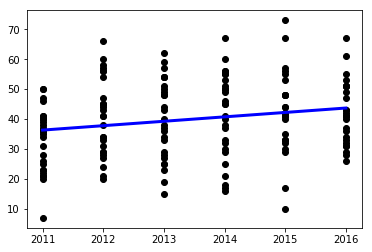

In [1276]:
predictions = reg.predict(Season)
plt.scatter(Season, series, color='black')
plt.plot(Season, predictions, color="blue", linewidth=3)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


AttributeError: module 'seaborn' has no attribute 'plt'

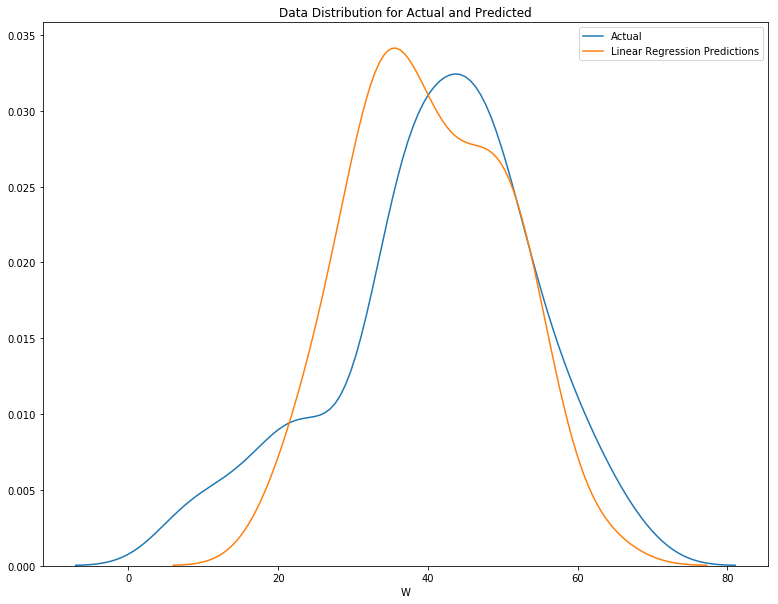

In [1277]:
X = df4.drop('W', axis=1)
y = df4['W']


# Split data into Train and Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3)
X_train['W'] = y_train

# Fit the Linear Regression on Train split
lr = smf.ols(formula='W ~ ThreePSum + ThreePAttemptSum + ThreePScored + Season + Team', data=X_train).fit()


# Predict using Test split
preds_lr = lr.predict(X_test)

# Plot how the predicted win_ratio compares to actual win ratio
f, ax = plt.subplots(figsize=(13,10))

plt.title('Data Distribution for Actual and Predicted')
sns.distplot(y_test, hist=False, label="Actual", ax=ax)
sns.distplot(preds_lr, hist=False, label="Linear Regression Predictions", ax=ax)

sns.plt.show()

In [1278]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     3.276
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           1.28e-05
Time:                        20:29:25   Log-Likelihood:                -402.38
No. Observations:                 113   AIC:                             864.8
Df Residuals:                      83   BIC:                             946.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -4014.0238   1626.547     -2.468      0.016   -7249.160    -778.888
Team[T.Boston Celtics]            -2.1747      6.895     -0.315      0.753     -15.889      11.540
Team[T.Charlotte Hornets]        -14.4977     11.074     -1.309      0.194     -36.524       7.529
Team[T.Chicago Bulls]              0.9043      7.373      0.123      0.903     -13.760      15.569
Team[T.Cleveland Cavaliers]       -5.9106      6.091     -0.970      0.335     -18.025       6.204
Team[T.Dallas Mavericks]          -5.1649      6.768     -0.763      0.448     -18.626       8.297
Team[T.Denver Nuggets]            -4.7893      6.886     -0.696      0.489     -18.485       8.906
Team[T.Detroit Pistons]          -16.2049      6.942     -2.334      0.022     -30.011      -2.398
Team[T.Golden State Warriors]      3.1973      7.953      0.402      0.689     -12.621      19.016
Team[T.Houston Rockets]            3.2423      6.759      0.480      0.633     -10.201      16.686
Team[T.Los Angeles Clippers]       5.1644      6.327      0.816      0.417      -7.421      17.749
Team[T.Los Angeles Lakers]       -12.6210      6.436     -1.961      0.053     -25.422       0.180
Team[T.Memphis Grizzlies]          0.8360      6.775      0.123      0.902     -12.639      14.311
Team[T.Miami Heat]                 1.2993      6.485      0.200      0.842     -11.600      14.198
Team[T.Milwaukee Bucks]          -10.8957      7.006     -1.555      0.124     -24.831       3.039
Team[T.Minnesota Timberwolves]   -16.6607      6.400     -2.603      0.011     -29.389      -3.932
Team[T.New Orleans Pelicans]     -14.9956      6.901     -2.173      0.033     -28.721      -1.270
Team[T.New York Knicks]          -11.8866      6.353     -1.871      0.065     -24.523       0.750
Team[T.Oklahoma City Thunder]      6.1623      7.376      0.835      0.406      -8.509      20.833
Team[T.Orlando Magic]            -20.4227      6.803     -3.002      0.004     -33.954      -6.892
Team[T.Philadelphia 76ers]       -18.0313      6.537     -2.758      0.007     -31.033      -5.030
Team[T.Portland Trail Blazers]    -9.0718      7.342     -1.236      0.220     -23.675       5.531
Team[T.Sacramento Kings]         -16.8479      6.905     -2.440      0.017     -30.581      -3.115
Team[T.San Antonio Spurs]          9.3865      6.830      1.374      0.173      -4.198      22.971
Team[T.Toronto Raptors]           -3.8953      6.921     -0.563      0.575     -17.662       9.871
Team[T.Utah Jazz]                 -7.7946      6.962     -1.120      0.266     -21.642       6.053
Team[T.Washington Wizards]       -11.5762      6.986     -1.657      0.101     -25.471       2.318
ThreePSum                          0.0055      0.004      1.357      0.179      -0.003       0.014
ThreePAttemptS

In [ ]:
# Import F-Table to look up F-Statistic
from scipy.stats import f

# F-Test to evaluate goodness of fit
test = lr.f_test(np.identity(len(lr.params)))
print(' Model - Calculated F-Statistic: ' + str(f.ppf(.95,test.df_num,test.df_denom)) + \
    ' F-Value: ' + str(test.fvalue[0][0]) + ' P-Value: ' + str(test.pvalue))

## Rejecting the Null Hypothesis

5.1 Null Hypothesis
We are looking at the impacts of 3 different statistics pertaining to three point shots on overall win percentage.
Null Hypothesis: None of the three point statistics have a noticeable impact on the Rating.
To test the null hypothesis, we will perform Multiple Linear Regression on the dataset using scikit-learn.

In [ ]:
df4["Team"] = pd.Categorical(df4["Team"])
df4["TeamCode"] = df4["Team"].cat.codes
df4.head(50)

In [ ]:
grouped_attrs = ['ThreePSum', 'ThreePAttemptSum', 'ThreePScored', 'TeamCode', 'Season']
features = df4[grouped_attrs]
target = df4[["W"]]

X = features
y = target['W']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

print(lm.score(X,y))
sk_coeffs = lm.coef_.tolist()
for attr, coef in zip(grouped_attrs, sk_coeffs):
    print("Attribute: {}, Coefficient: {}".format(attr, coef))